# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.
____
Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

## Get the Data

In this section we will use pandas to directly read data from Yahoo finance using pandas!
<br>First, we need to start with the proper imports.

Note: 
* We'll need to install pandas-datareader for this to work! (**pip install pandas-datareader**). <br>Pandas datareader allows us to read stock information directly from the internet.

* We also need to install yfinance! (<b>pip install yfinance</b>)

### The Imports

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**The stock data for each of these banks from Jan 1st 2006 to Jan 1st 2016 will be gathered. We'll set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Using datetime to set start and end datetime objects.
2. Figuring out the ticker symbol for each bank.
2. Figuring out how to use datareader to grab info on the stock.

##### WARNING: LOOK FOR THE LATEST WORKING API. "yfinance" MAY NOT ALWAYS WORK.

In [2]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

In [3]:
yf.pdr_override()

# Bank of America
BAC = pdr.get_data_yahoo('BAC', start, end)

# CitiGroup
C = pdr.get_data_yahoo("C", start, end)

# Goldman Sachs
GS = pdr.get_data_yahoo("GS", start, end)

# JPMorgan Chase
JPM = pdr.get_data_yahoo("JPM", start, end)

# Morgan Stanley
MS = pdr.get_data_yahoo("MS", start, end)

# Wells Fargo
WFC = pdr.get_data_yahoo("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Could also do this for a Panel Object
df = pdr.get_data_yahoo(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start, end)

[*********************100%***********************]  6 of 6 completed


**Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Setting the column name levels**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Rounding the dataframe to 2 decimal places**

In [8]:
bank_stocks = bank_stocks.round(2)

**Checking the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.head()

Bank Ticker                  BAC                                           \
Stock Info                  Open   High    Low  Close Adj Close    Volume   
Date                                                                        
2006-01-03 00:00:00-05:00  46.92  47.18  46.15  47.08     33.17  16296700   
2006-01-04 00:00:00-05:00  47.00  47.24  46.45  46.58     32.82  17757900   
2006-01-05 00:00:00-05:00  46.58  46.83  46.32  46.64     32.86  14970700   
2006-01-06 00:00:00-05:00  46.80  46.91  46.35  46.57     32.81  12599800   
2006-01-09 00:00:00-05:00  46.72  46.97  46.36  46.60     32.83  15619400   

Bank Ticker                    C                       ...     MS         \
Stock Info                  Open   High    Low  Close  ...    Low  Close   
Date                                                   ...                 
2006-01-03 00:00:00-05:00  490.0  493.8  481.1  492.9  ...  56.74  58.31   
2006-01-04 00:00:00-05:00  488.6  491.0  483.5  483.8  ...  58.35  58.35   
2006-01-05 00:00:00-05:00  484.4  487.8  484.0  486.2  ...  58.02  58.51   
2006-01-06 00:00:00-05:00  488.8  489.0  482.0  486.2  ...  58.05  58.57   
2006-01-09 00:00:00-05:00  486.0  487.4  483.0  483.9  ...  58.62  59.19   

Bank Ticker                                     WFC                       \
Stock Info                Adj Close   Volume   Open   High    Low  Close   
Date                                                                       
2006-01-03 00:00:00-05:00     34.89  5377000  31.60  31.98  31.19  31.90   
2006-01-04 00:00:00-05:00     34.91  7977800  31.80  31.82  31.36  31.53   
2006-01-05 00:00:00-05:00     35.01  5778000  31.50  31.56  31.31  31.50   
2006-01-06 00:00:00-05:00     35.04  6889800  31.58  31.77  31.39  31.68   
2006-01-09 00:00:00-05:00     35.41  4144500  31.67  31.83  31.56  31.67   

Bank Ticker                                    
Stock Info                Adj Close    Volume  
Date                                           
2006-01-03 00:00:00-05:00     19.98  11016400  
2006-01-04 00:00:00-05:00     19.74  10870000  
2006-01-05 00:00:00-05:00     19.72  10158000  
2006-01-06 00:00:00-05:00     19.84   8403800  
2006-01-09 00:00:00-05:00     19.83   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! We will be using **Multi-Level Indexing** and **.xs**

**What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. A for loop can be used for each Bank Stock Ticker to create the returns column and set's it as a column in the returns DataFrame.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00-05:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00-05:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06 00:00:00-05:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09 00:00:00-05:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


**Creating a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

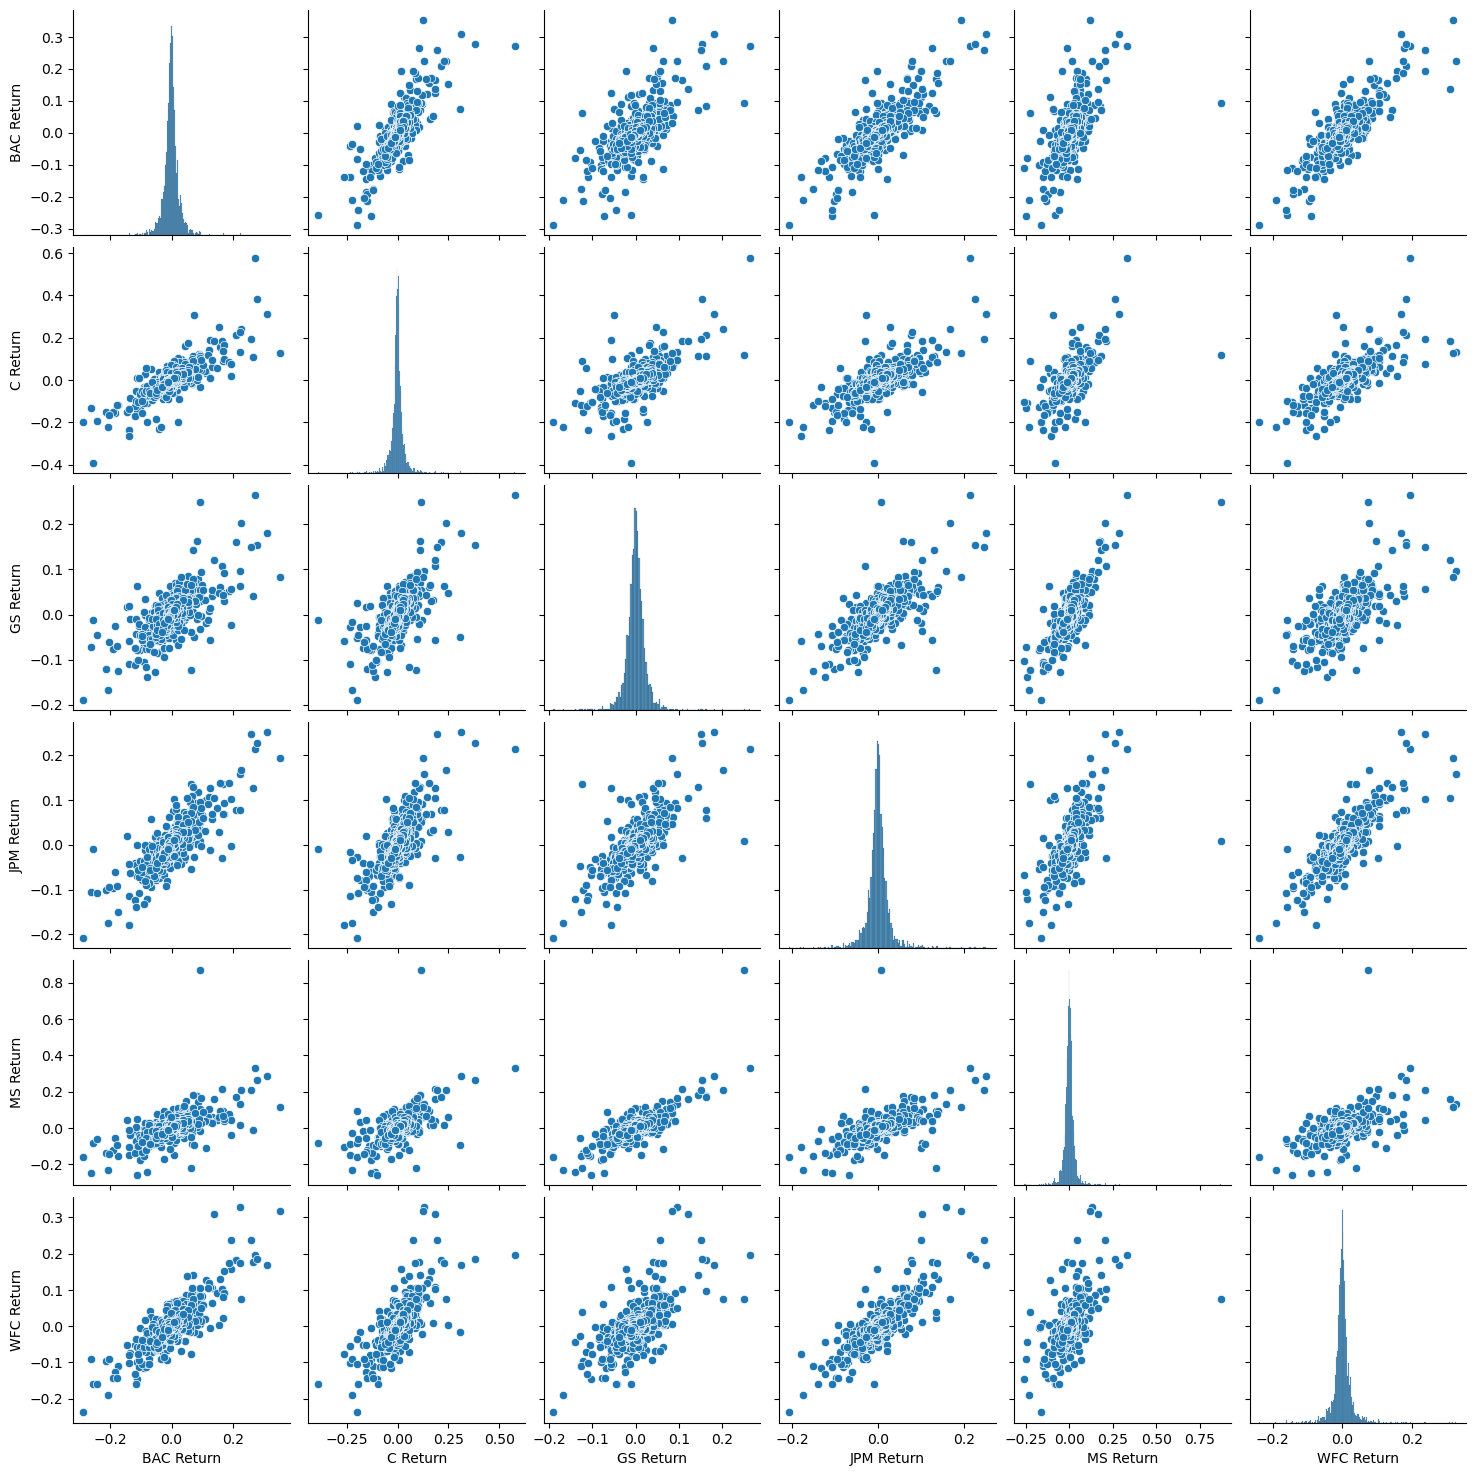

In [13]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

**Using this returns DataFrame, we can determine on what dates each bank stock had the best and worst single day returns. Four of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20 00:00:00-05:00
C Return     2009-02-27 00:00:00-05:00
GS Return    2009-01-20 00:00:00-05:00
JPM Return   2009-01-20 00:00:00-05:00
MS Return    2008-10-09 00:00:00-04:00
WFC Return   2009-01-20 00:00:00-05:00
dtype: datetime64[ns, America/New_York]

**Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

[Citigroup had a stock split.](https://www.citigroup.com/citi/news/2011/110509a.htm)

In [15]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09 00:00:00-04:00
C Return     2008-11-24 00:00:00-05:00
GS Return    2008-11-24 00:00:00-05:00
JPM Return   2009-01-21 00:00:00-05:00
MS Return    2008-10-13 00:00:00-04:00
WFC Return   2008-07-16 00:00:00-04:00
dtype: datetime64[ns, America/New_York]

**Taking a look at the standard deviation of the returns, which stock would be classified as the riskiest over the entire time period? Which would be classified as the riskiest for the year 2015?**

In [16]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley**

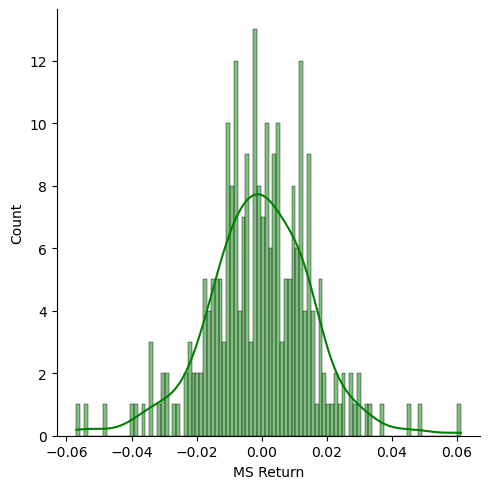

In [18]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], kde=True, color='green',bins=100)

**Creating a distplot using seaborn of the 2008 returns for CitiGroup**

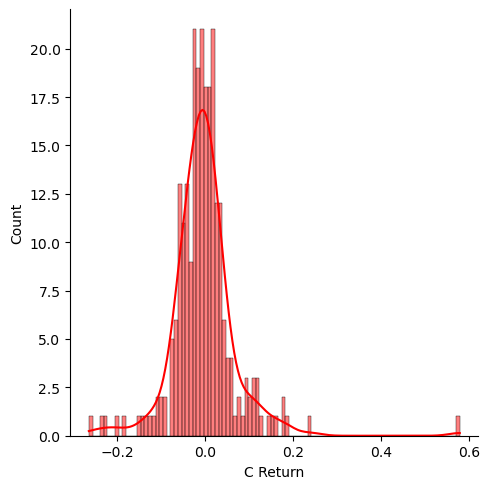

In [19]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], kde=True, color='red',bins=100)

____
# More Visualization

**pip install cufflinks**

### Imports

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time.**

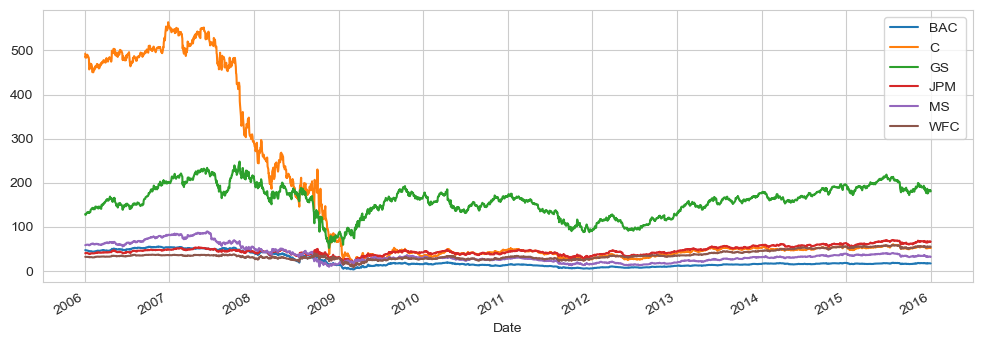

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

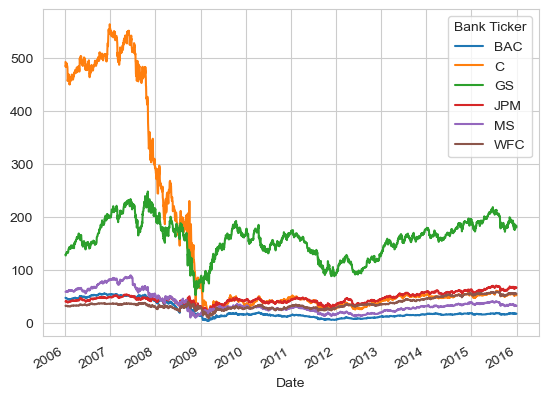

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [23]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

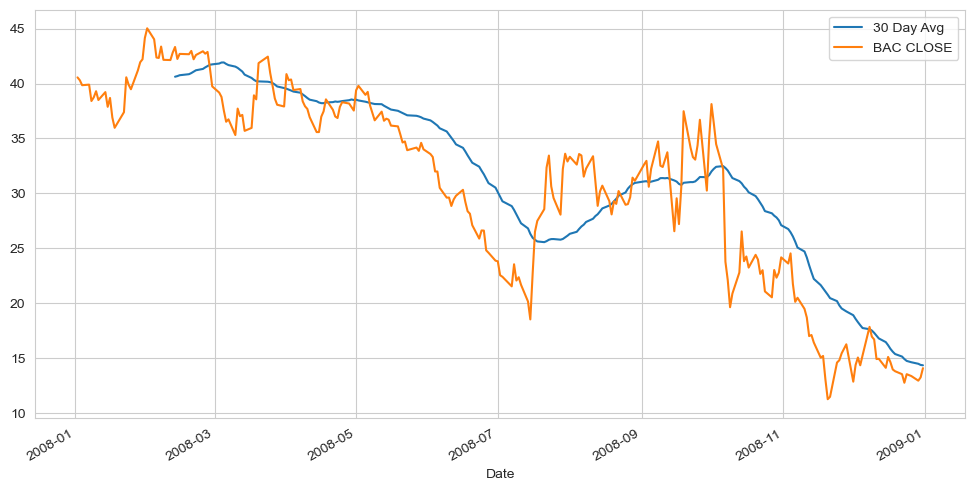

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

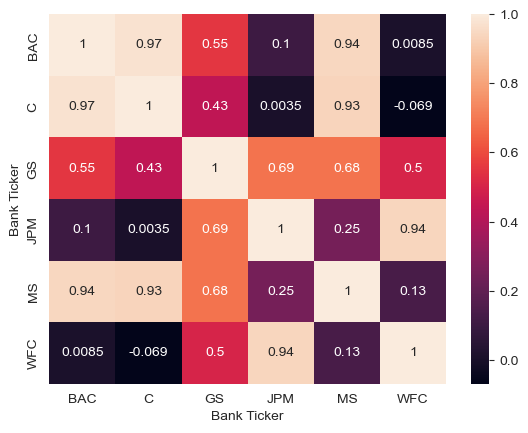

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Using seaborn's clustermap to cluster the correlations together:**

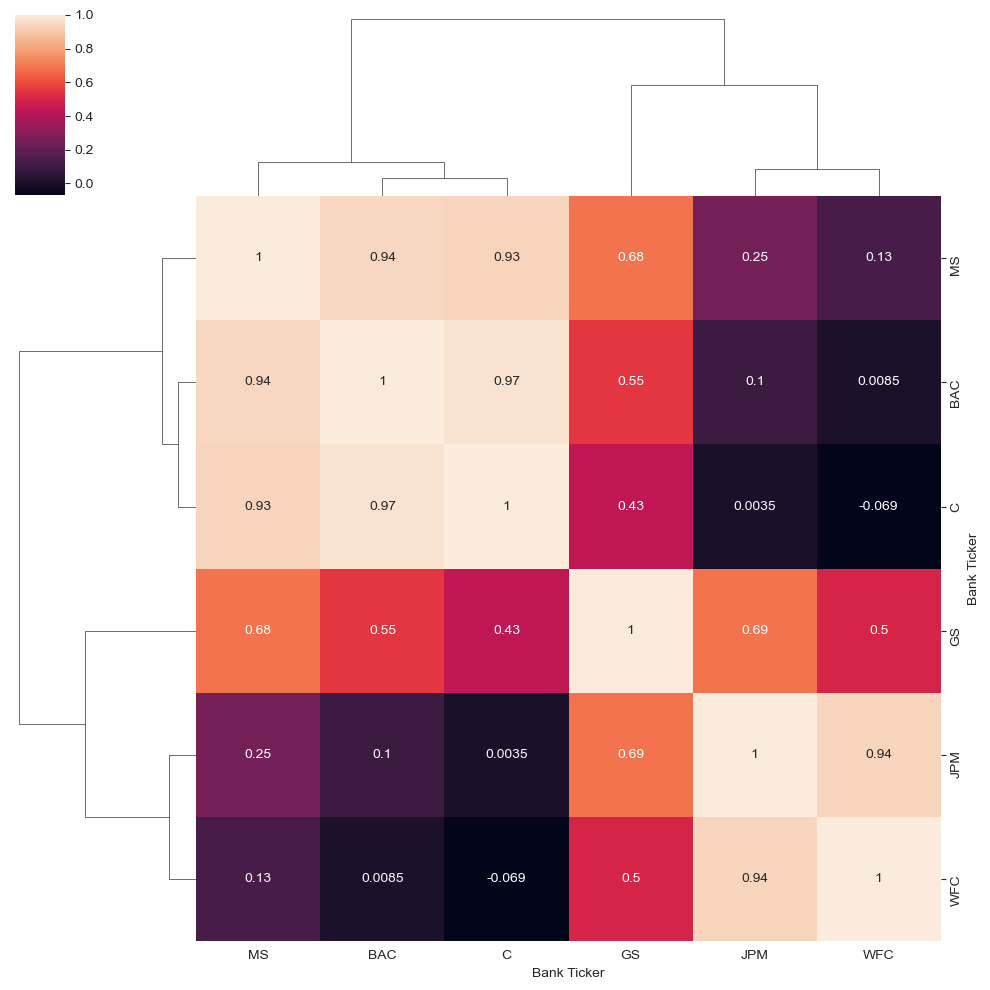

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

We will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project(the functionality could be broken in the future).

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [28]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [29]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [30]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')